3 properties of a good baseline model:
- simple
- fast
- repeatable

The most common one for supervised ml - Zero rule algorithm
- majority class in classification or
- average outcome for regression


equivalent technique for TS: Persistence algorithm
- use value at t to predict value at t+1

Persistence algo steps:
- transoform univariate dataset into supervised problem
- train and test datasets
- define persistence model
- make forecast and establish baseline performance
- review and plot output}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

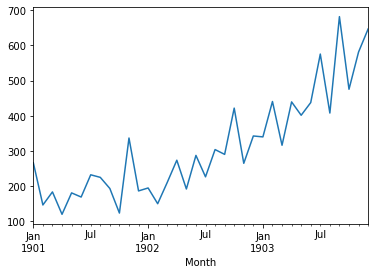

In [2]:
def parser(X):
    return datetime.strptime('190'+X, '%Y-%m')
df = pd.read_csv('data/monthly-shampoo-sales.csv', header=0,index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
df.plot()
plt.show()

In [3]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head())

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [4]:
X = dataframe.values
train_size = int(len(X)*0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [5]:
def persistence_model(x):
    return x

In [6]:
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
    yhat = persistence_model(x)
    predictions.append(yhat)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.2f' %rmse)

Test RMSE: 133.16


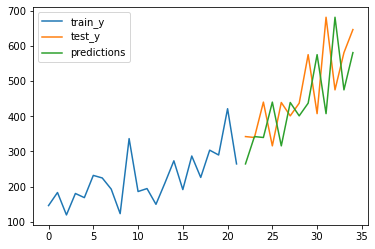

In [7]:
plt.plot(train_y, label='train_y')
plt.plot([None for i in train_y] + [x for x in test_y], label='test_y')
plt.plot([None for i in train_y] + [x for x in predictions], label='predictions')
plt.legend()
plt.show()